# De python a sympy

In [20]:
#-*- coding: utf-8 -*-
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
[x**2 for x in range(-10, 11)]

In [22]:
from sympy import *
import numpy as np
init_printing()

def separar_campos(expr):
    '''Esta función toma un lagrangiano L y sustrae de cada termino la parte 
    que esta involucrada con los campos'''
    lista = [expr.args[i].args_cnc() for i in range(len(expr.args))]
    lista_campos = [np.prod(np.array(lista[i][1])) for i in range(0,len(lista))]
    lista = lista_campos
    for i in range(0,len(lista)):
        if lista[i]==1.0:
            lista[i]=S(1)
    return lista

## Ciclos en python
Los ciclos en python son de la siguiente forma:

In [4]:
for i in range(10):
    print(i**2)

0
1
4
9
16
25
36
49
64
81


In [6]:
if -5>0:
    print('Esto es verdad')
else:
    print('No es cierto')

No es cierto


### List comprenhension
python permite obtener listas, diccionarios o tuplas utilizando el concepto de **list comprenhension**, su estructura es la siguiente:

In [7]:
[i**2 for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [15]:
diccionario = {i:i**2 for i in range(10)}
diccionario

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

## Modificando elementos de una lista

In [17]:
lista = [i**2 for i in range(10)]
lista

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [21]:
lista[0]
lista[2]

0

4

In [23]:
[i**(1/2) for i in lista]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [24]:
lista_sqrt = [sqrt(i) for i in lista]
lista_sqrt

NameError: name 'sqrt' is not defined

## format

En python se pueden utilizar muchas formas de manipular cadenas (strings), una de estas maneras, es atra vez de la función format. Por ejemplo

In [26]:
print('{} es un gran hombre'.format('Pedro'))

Pedro es un gran hombre


In [28]:
print('{a}{b} es un gran hombre'.format(a='Juan ',b='y Pedro'))

Juan y Pedro es un gran hombre


Usando nuestros ciclos y el función 'format', podemos crear cadenas que siguen algun patrón, por ejemplo:

In [29]:
for nombre in ['Juan', 'Pedro','Pablo']:
    print('{a} es un gran hombre'.format(a=nombre))

Juan es un gran hombre
Pedro es un gran hombre
Pablo es un gran hombre


In [30]:
for nombre in ['Juan', 'Pedro','Pablo']:
    if nombre[0]=='P':
        print('{a} es un gran hombre'.format(a=nombre))
    else:
        print('{a} no es un buen hombre'.format(a=nombre))

Juan no es un buen hombre
Pedro es un gran hombre
Pablo es un gran hombre


## Aplicaciones en sympy


In [32]:
from sympy import *
init_printing()

def dic_inv(dicc):
    '''
    Esta función toma un diccionario e invierte sus 
    claves y valores
    '''
    claves = list(dict.keys(dicc))
    return {dicc[i]:i for i in claves}

### Notación relativista

In [33]:
x_ = {i:symbols('x_{a}'.format(a=i)) for i in range(4)}
x_

In [34]:
x_[3]

In [36]:
x = {i:symbols('x^{a}'.format(a=i)) for i in range(4)}
x
x[0]

In [40]:
Add(*[x_[i]*x[i] for i in range(4)]).subs({x[0]:0,x[1]:2})

### Potencial de ME

In [42]:
from sympy.physics.quantum import Dagger, HermitianOperator
# Definamos los campos ϕ_i con i = 1,..4
ϕ = {i:HermitianOperator(r'\phi_{a}'.format(a=i)) for i in range(1,5)}
ϕ

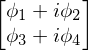

In [43]:
Φ = Matrix([ϕ[1] + I*ϕ[2],ϕ[3] + I*ϕ[4]])
Φ

In [45]:
A = (Matrix(list(map(Dagger, Φ))).T*Φ)[0]
A

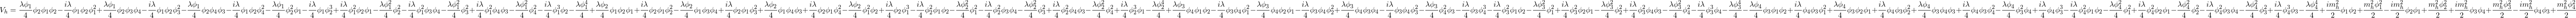

In [115]:
m_h = Symbol(r'm_h')
λ = Symbol(r'\lambda')
V_h = Symbol(r'V_h')

V = (m_h**2/2)*A - (λ/4)*(A)**2
Eq(V_h, V.expand())

### Problema

Crear una función que tomé como input una expresión (V) y una lista que contenga campos, de tal forma que el output sea la expresión original pero con los campos conmutados. 

**Recuerda que:** en sympy puedes usar el comando subs para sustituir los campos por simbolos que si conmuten para después simplificar y finalmente volver a sustituir los simbolos conmutativos por los operadores originales